# Elapsed time scaling

In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["figure.dpi"] = 80
plt.rcParams["font.size"] = 14

In [2]:
output_dir = Path("output-times")


def load_times(*, structure="reactant", use_parallel, n):
    mode = "parallel" if use_parallel else "serial"
    return np.loadtxt(output_dir / f"{structure}_{n}_{mode}_0.txt")

In [3]:
n_values = [2, 4, 6, 8, 10]
t_idx = (
    1  # see demo notebook; does not include Ray initialization/deinitialization time
)
marker = "."

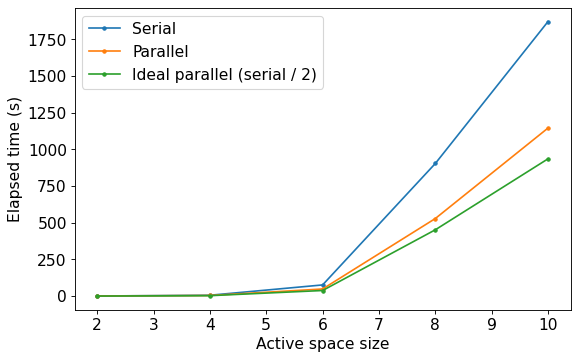

In [4]:
def make_scaling_plot():
    plt.plot(
        n_values,
        [load_times(use_parallel=False, n=n)[t_idx] for n in n_values],
        label="Serial",
        marker=marker,
    )
    plt.plot(
        n_values,
        [load_times(use_parallel=True, n=n)[t_idx] for n in n_values],
        label="Parallel",
        marker=marker,
    )
    plt.plot(
        n_values,
        [load_times(use_parallel=False, n=n)[t_idx] / 2 for n in n_values],
        label="Ideal parallel (serial / 2)",
        marker=marker,
    )
    plt.xlabel("Active space size")
    plt.ylabel("Elapsed time (s)")
    plt.legend(loc="best")


make_scaling_plot()

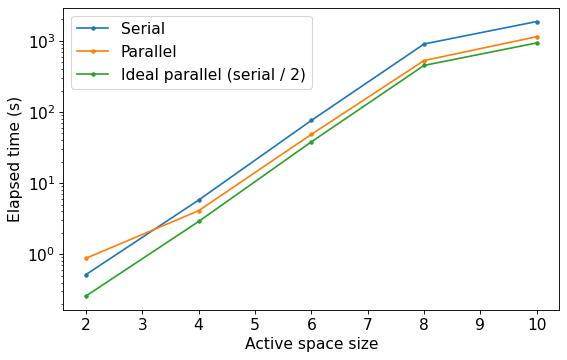

In [5]:
# Same thing, on a semi-log plot
make_scaling_plot()
plt.yscale("log")

### Speedup ($T_\mathrm{serial} / T_\mathrm{parallel}$)

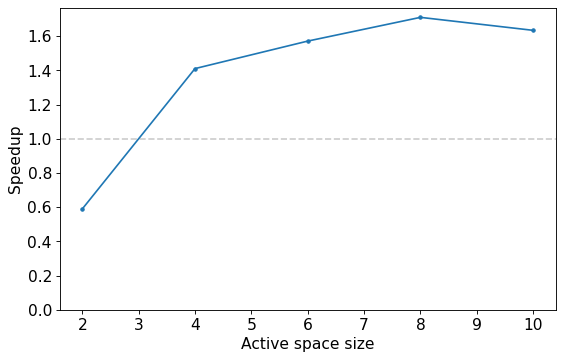

In [6]:
plt.axhline(1.0, c="#ccc", linestyle="--")
plt.plot(
    n_values,
    [
        load_times(use_parallel=False, n=n)[t_idx]
        / load_times(use_parallel=True, n=n)[t_idx]
        for n in n_values
    ],
    marker=marker,
)
plt.xlabel("Active space size")
plt.ylabel("Speedup")
plt.ylim(0, None)
None